In [32]:
import numpy as np
import pandas as pd

# K-Means Algorithm

K-Means algorithm is a clustring algorithm. It is also a classic Expectation-Maximization algorithm.<br>
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [33]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
            Some initializations, if neccesary

            Parameter:
                k: Number of clusters we are trying to classify
                num_iter: Number of iterations we are going to loop
        """

        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None

    def train(self, X):
        """
            Train the given dataset

            Parameter:
                X: Matrix or 2-D array. Input feature matrix.

            Return:
                self: the whole model containing relevant information
        """

        r, c = X.shape
        centers = []
        RM = np.zeros((r, self.k))

        """
            TODO: 1. Modify the following code to randomly choose the initial centers
        """
        initial_indices = np.random.choice(r, self.k, replace=False)
        for i in initial_indices:
            centers.append(X[i, :])
        centers = np.array(centers)

        for i in range(self.num_iter):
            for j in range(r):
                """
                    TODO: 2. Modify the following code to update the Relation Matrix
                """
                distances = np.linalg.norm(X[j] - centers, axis=1)
                minpos = np.argmin(distances)

                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j,:] = temp_rm
            new_centers = centers.copy()
            for l in range(self.k):
                """
                    TODO: 3. Modify the following code to update the centers
                """
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                if len(all_l) > 0:
                    new_centers[l, :] = np.mean(all_l, axis=0)
            if np.sum(np.abs(new_centers - centers)) < 0.00000000000000000000000001:
                self.centers = new_centers
                self.RM = RM
                return self
            centers = new_centers
        self.centers = centers
        self.RM = RM
        return self

In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [35]:
X = X[:,2:4]

In [36]:
clf = KMeans(k = 3)
model = clf.train(X)

(50, 2)
(52, 2)
(48, 2)


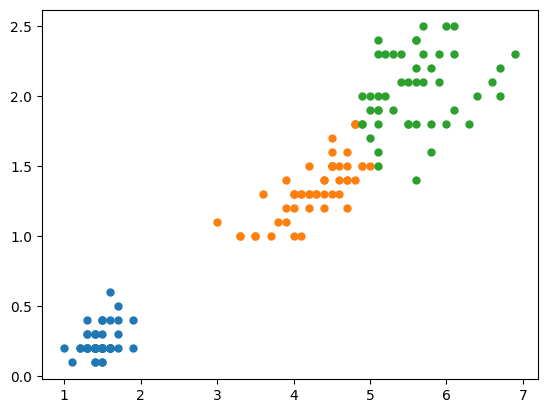

In [37]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [38]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(41, 2)
(58, 2)
(51, 2)


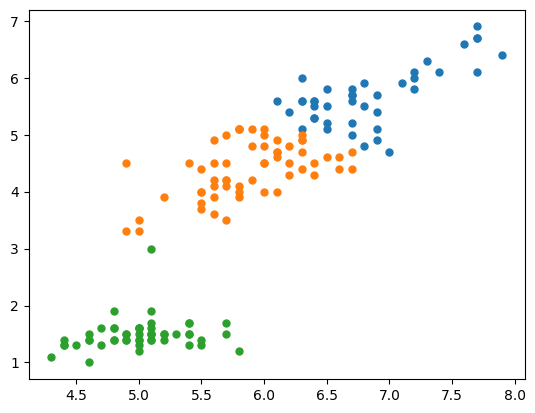

In [39]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [40]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [41]:
clf = KMeans(k = 3)
model = clf.train(X)

In [42]:
from mpl_toolkits.mplot3d import Axes3D

In [43]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = model.RM[:,i] == 1
    groups.append(X[index])

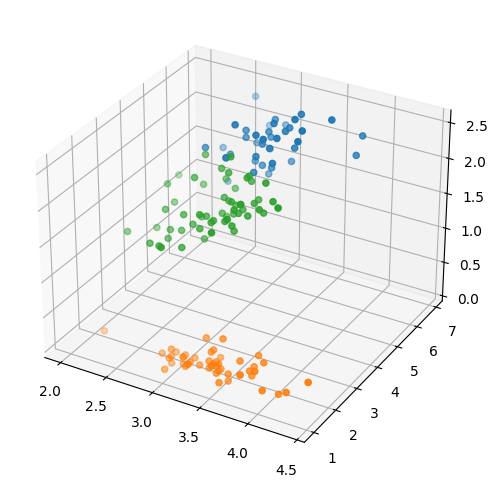

In [44]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

plt.show()

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [45]:
def gaussian(X, mu, cov):
    """
        Fucntion to create mixtures using the Given matrix X, given covariance and given mu

        Return:
        transformed x.
    """
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [47]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

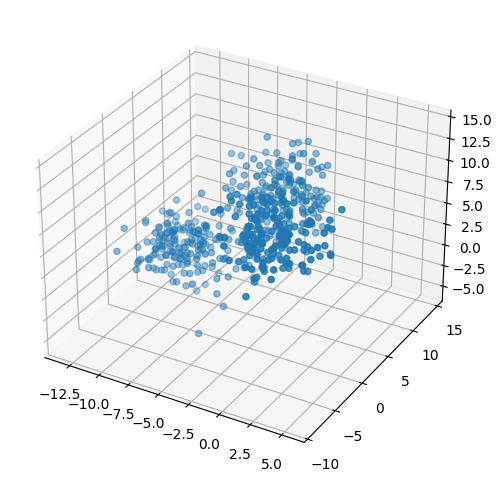

In [48]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
plt.show()

In [49]:
def initialize_clusters(X, n_clusters):
    """
        Initialize the clusters by storing the information in the data matrix X into the clusters

        Parameter:
            X: Input feature matrix
            n_clusters: Number of clusters we are trying to classify

        Return:
            cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])

    # We use the KMeans centroids to initialise the GMM

    kmeans = KMeans().train(X)
    mu_k = kmeans.centers

    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })

    return clusters

In [50]:
def expectation_step(X, clusters):
    """
        "E-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)

    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']

        posterior = gaussian(X, mu_k, cov_k) * w_k

        for i in range(X.shape[0]):
            totals[i] += posterior[i][0]

        cluster['posterior'] = posterior

    for cluster in clusters:
        posterior_normalized = cluster['posterior'] / totals
        cluster['posterior'] = posterior_normalized
        cluster['totals'] = totals

In [51]:
def maximization_step(X, clusters):
    """
        "M-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    N = float(X.shape[0])

    for cluster in clusters:
        posterior = cluster['posterior'].reshape(-1, 1)
        N_k = np.sum(posterior, axis=0)

        """
            TODO: 7. Calculate the new cluster data
        """
        w_k = N_k / N
        mu_k = np.dot(posterior.T, X) / N_k

        cov_k = np.zeros((X.shape[1], X.shape[1]))
        for j in range(X.shape[0]):
            diff = (X[j] - mu_k).reshape(-1, 1)
            cov_k += posterior[j] * np.dot(diff, diff.T)
        cov_k /= N_k

        cluster['w_k'] = w_k[0]
        cluster['mu_k'] = mu_k.flatten()
        cluster['cov_k'] = cov_k

In [52]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [53]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):

        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)

    return clusters, likelihoods, scores, sample_likelihoods

In [54]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [55]:
from sklearn.cluster import KMeans

In [56]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[-3.37435786  7.78319724  6.82489845]
 [ 0.88770756 -3.42069792  9.67362384]
 [-8.99207957  2.21782216  1.21346601]]
Means by our implementation:
 [[ 0.03477939 -4.54424331 10.47775325]
 [-6.18267702  4.99679236  4.01904135]
 [ 1.66946653 -2.4092655   8.94552543]]
Scores by sklearn:
 [ -6.15386671  -7.65255958  -6.46171345  -7.56324069  -8.27579137
  -6.53332121  -6.05949598  -7.5401882   -7.89315341  -8.40684883
  -5.9842903   -6.73900978  -6.32856857  -7.48163822  -7.71554453
  -6.36462494  -7.46232128 -10.74119069  -6.22598054  -5.98105236]
Scores by our implementation:
 [-6.89266669 -8.31747139 -6.65203725 -8.32032647 -7.67771159 -6.99522516
 -6.68790621 -8.04443914 -7.94068271 -8.33031994 -6.63991899 -7.53492071
 -7.00014516 -7.0486645  -8.33116592 -6.28564372 -7.04694183 -8.27643411
 -6.91501462 -6.75773381]
